# Heirarchical Transformations

F. Estrada - CSC D18 - Computer Graphics, Fall 2019
Modified into Juptyer by Mustafa Quraish, 2019

---

*Note: This notebook assumes you already have all the files with transformations defined from Week 3 in the same folder. If you don't, make sure you download them from the course site / generate them using the Jupyter notebook from that week.*

---
 
This script is meant to help you understand how we build complex articulated shapes using hierarchical transformations.

Here, a simple 'robot-arm' is made of a few rectangular components (remember they have to start rectangular because hierarchical transforms don't work with non-uniform scaling).

---

First, let's define the function to draw a basic robot-arm containing 3 parts, given:

- $\theta$ - the angle between the first part and the second
- $\phi$ - the angle between the second part and the third

We assume for now that subsequent parts are $80\%$ the size of the previous one, but that could always be passed in.

In [48]:
%%file heirarchical.m

% You may want to add more parameters here for the exercises...
function [] = heirarchical(theta, phi);

    % A 2D box centered along the Y axis
    x = [-.5: .01: .5]';
    y = [  0: .01:  1]';
    
    box=[           x         , zeros(length(x),1),
         -.5*ones(length(x),1),         y         ,
                    x         ,  ones(length(x),1),
          .5*ones(length(x),1),         y         ];
          
    box(:, end+1) = zeros(length(box), 1);
    box(:, end+1) = ones(length(box), 1);

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    % We will use rectangular parts, we know we don't want to
    % use non-uniform scaling with hierarchical transforms, so
    % we will prescale the box
    
    bT = S(box',[1 2 1 1]');  % bT is not a rectangular 'part' 
                              % that is 2 units tall and 1 unit wide

    M1 = eye(4,4); % Identity matrix is the first part's transform

    b1 = M1 * bT;  % Part 1 is just M1*bT

    figure(1); clf; hold on; grid on; axis equal;
    title('Hierarchical transforms example');
    plot(b1(1,:), b1(2,:), 'b.');

    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    % Second part. Attached to the first part, rotated by theta degrees away
    % from VERTICAL (i.e. zero means it is still a rectangle pointing up),
    % and the part is 80% the size of part 1

    M2 = eye(4,4);    % This will apply part2's local transform.
                      % initially it's the identity matrix.

    % Any shanges in size have to be applied first. In this case scale by
    % 80% along x and y. Get a transform matrix for that - but don't apply it
    % to the box's points yet (use a dummy vector)
    [temp, Ms] = S([0 0 0 0]', [.8 .8 1 1]');

    % Now apply any rotation needed. In this case, rotation in the x-y plane by
    % angle theta means a rotation around the z axis by theta.
    [temp, Mr] = Rz([0 0 0 0]', theta);

    % Finally, translate to the top of part1, since part1 is 2 units long
    % along y, simply translate by 2 along y
    [temp, Mt] = T([0 0 0 0]', [0 2 0 1]');

    % Compose the hierarchical transform matrix for part 2. Notice the order of
    % matrix multiplication.
    M2 = Mt * Mr * Ms;

    % To generate the points for part 2, we have to apply M2 and M1, in the
    % correct order! in this case, left to right!
    b2 = M1 * M2 * bT;

    plot(b2(1,:), b2(2,:), 'r.');
    
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    % Part 3 is located at the end of part2, rotated by `phi` degrees from the
    % vertical axis of part 2, and scaled by 80% again

    [temp, Ms] = S([0 0 0 0]', [.8 .8 1 1]');  % <- It's the same as part2!
    [temp, Mr] = Rz([0 0 0 0]', phi);
    [temp, Mt] = T([0 0 0 0]', [0 2 0 1]');    % <- Also the same as part2!

    M3 = Mt * Mr * Ms;

    % To generate points for part 3, apply M3, M2, and M1 in the correct order
    % to our input box.

    b3 = M1 * M2 * M3 * bT;

    plot(b3(1,:), b3(2,:), 'm.');

Created file '/home/mustafa/Desktop/D18/W3/heirarchical.m'.


Before we move on, make sure you understand what the function above is doing. Once you think you understand it, see if the following output makes sense to you. Tweak the parameters and see the output till you're convinced you get it!

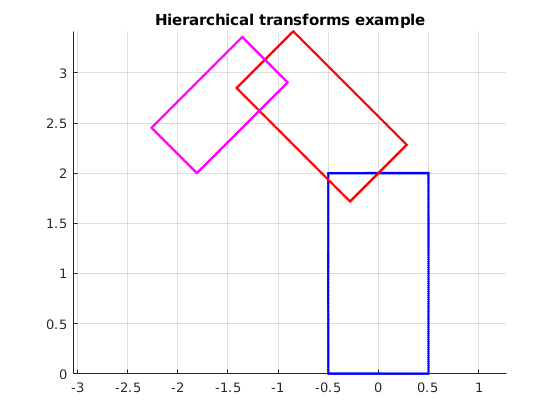

In [53]:
heirarchical(pi/4, pi/2);

---

## Exercises

1. Change the `heirarchical` function above so that the robot-arm now has $3$ fingers attached to the hand (the last part). The fingers should have adjustable angles. 


In [ ]:
heirarchical(pi/2, pi/3, ... ) % Now includes angles for the fingers!